In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_csv('Housing.csv')
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [8]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [9]:
X = data.drop('price', axis=1)
y = data['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 1771751116594.0347
R2 Score: 0.6494754192267804


In [14]:
import joblib
joblib.dump(model, 'House_Price_prediction.pkl')

['House_Price_prediction.pkl']

In [18]:
import numpy as np

# Load the model
model = joblib.load('House_Price_prediction.pkl')

# Example: Predict the price of a house with given features
new_house = np.array([[8000, 4, 3, 2, 1, 1, 0, 0, 1, 2, 1, 2]])  # Example features
predicted_price = model.predict(new_house)
print(f'Predicted Price: {predicted_price}')

Predicted Price: [8644111.32994564]


c:\Users\Kawsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\Kawsar\AppData\Local\Temp\ipykernel_4616\1712505474.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


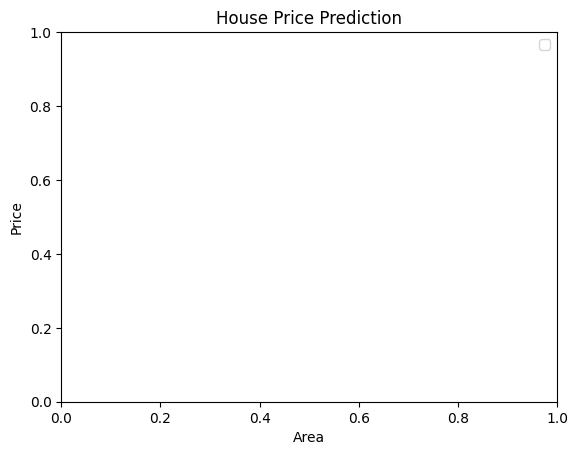

In [24]:
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

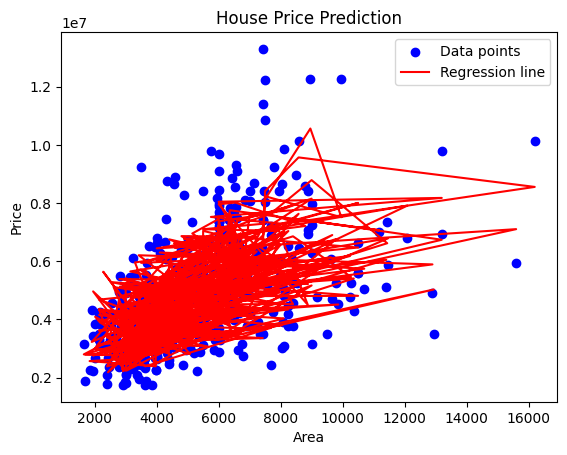

In [20]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.scatter(data['area'], data['price'], color='blue', label='Data points')

# Plotting the regression line
plt.plot(data['area'], model.predict(data.drop('price', axis=1)), color='red', label='Regression line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

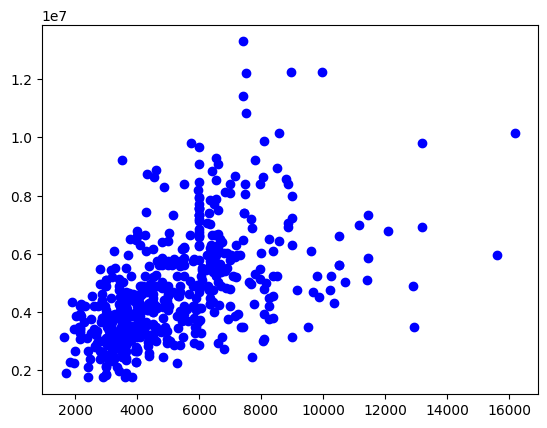

In [21]:
plt.scatter(data['area'], data['price'], color='blue', label='Data points')

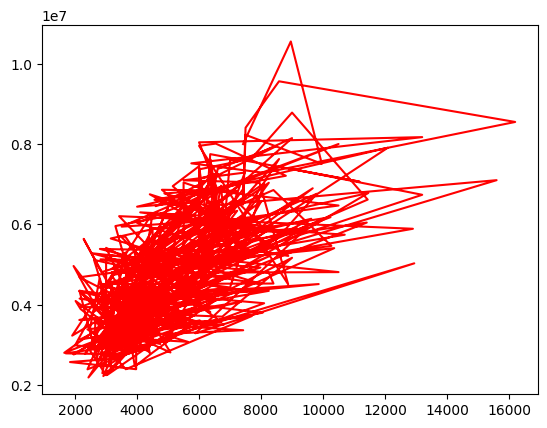

In [22]:
plt.plot(data['area'], model.predict(data.drop('price', axis=1)), color='red', label='Regression line')